In [20]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'd2a0c929-d5cc-4efd-84d2-42b636726cc8',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video

In [22]:
type(data)

dict

In [28]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [30]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11649,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.974401e+07,1.974401e+07,False,NaN,1,NaN,NaN,None,2024-08-23T14:44:00.000Z,61625.535184,2.690767e+10,-22.8258,1.032864,1.742019,5.603929,-8.025808,0.772718,-10.704727,1.216735e+12,55.8071,1.294136e+12,None,2024-08-23T14:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-23 20:15:52.252172
1,1027,Ethereum,ETH,ethereum,9243,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202961e+08,1.202961e+08,True,NaN,2,NaN,NaN,None,2024-08-23T14:43:00.000Z,2666.671795,1.213928e+10,-0.3712,0.417570,1.953176,2.757910,-22.628576,-19.341964,-28.746581,3.207903e+11,14.6976,3.207903e+11,None,2024-08-23T14:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-23 20:15:52.252172
2,825,Tether USDt,USDT,tether,95275,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.176760e+11,1.202564e+11,True,NaN,3,NaN,NaN,None,2024-08-23T14:43:00.000Z,1.000156,4.642818e+10,-14.9553,0.024218,-0.017542,-0.032337,-0.036104,0.026719,0.017832,1.176943e+11,5.3924,1.202751e+11,None,2024-08-23T14:43:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-23 20:15:52.252172
3,1839,BNB,BNB,bnb,2218,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459355e+08,1.459355e+08,False,NaN,4,NaN,NaN,None,2024-08-23T14:43:00.000Z,579.845294,1.937361e+09,-0.9357,0.119302,-1.507157,11.971684,-1.204257,2.351562,-3.583292,8.462003e+10,3.8819,8.462003e+10,None,2024-08-23T14:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-23 20:15:52.252172
4,5426,Solana,SOL,solana,721,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.659297e+08,5.828853e+08,True,NaN,5,NaN,NaN,None,2024-08-23T14:43:00.000Z,144.827914,1.425770e+09,-22.7566,0.518483,1.160743,3.983800,-19.636257,12.535898,-13.803999,6.747962e+10,3.0906,8.441805e+10,None,2024-08-23T14:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-23 20:15:52.252172
5,3408,USDC,USDC,usd-coin,21643,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.451465e+10,3.451465e+10,False,NaN,6,NaN,NaN,None,2024-08-23T14:43:00.000Z,0.999915,5.569553e+09,0.7178,0.008349,-0.018507,-0.034484,-0.032834,-0.039700,-0.008526,3.451172e+10,1.5829,3.451172e+10,None,2024-08-23T14:43:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-23 20:15:52.252172
6,52,XRP,XRP,xrp,1370,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.618009e+10,9.998732e+10,False,NaN,7,NaN,NaN,None,2024-08-23T14:44:00.000Z,0.599664,9.814102e+08,-9.2070,0.546541,0.071850,6.831860,-5.064869,24.957775,11.800510,3.368920e+10,1.5435,5.996644e+10,None,2024-08-23T14:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-23 20:15:52.252172
7,11419,Toncoin,TON,toncoin,523,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.525852e+09,5.110948e+09,True,NaN,8,3.414167e+09,2.245306e+10,None,2024-08-23T14:43:00.000Z,6.576438,1.979165e+08,-36.8903,-0.109464,0.921668,2.248359,-5.651982,-10.090752,2.438061,1.661111e+10,0.7620,3.361183e+10,None,2024-08-23T14:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-23 20:15:52.252172
8,74,Dogecoin,DOGE,dogecoin,1044,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me.

In [36]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'd2a0c929-d5cc-4efd-84d2-42b636726cc8',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

    #df2 = pd.json_normalize(data['data'])
    #df2['Timestamp'] = pd.to_datetime('now')
    #df = pd.concat([df, df2]) 

    #Use this if you want to create a csv and append data to it
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r'/Users/deepaktiwari/Python/API.csv'):
        df.to_csv(r'/Users/deepaktiwari/Python/API.csv', header='column_names')
    else:
        df.to_csv(r'/Users/deepaktiwari/Python/API.csv', mode='a', header=False)

    #df = pd.read_csv(r'/Users/deepaktiwari/Python/API.csv')
    
# If that didn't work try using the local host URL as shown in the video

In [44]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [46]:
df72 = pd.read_csv(r'/Users/deepaktiwari/Python/API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11649,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.974401e+07,1.974401e+07,False,NaN,1,NaN,NaN,NaN,2024-08-23T15:03:00.000Z,61024.213895,2.782195e+10,-19.2885,-0.942763,0.672444,5.132821,-8.579502,-0.350386,-11.595444,1.204863e+12,55.7243,1.281508e+12,NaN,2024-08-23T15:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-23 20:35:30.733576
1,1,1027,Ethereum,ETH,ethereum,9243,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202961e+08,1.202961e+08,True,NaN,2,NaN,NaN,NaN,2024-08-23T15:03:00.000Z,2652.859447,1.244849e+10,3.3478,-1.117253,1.813430,2.698675,-22.800279,-19.722869,-29.237996,3.191288e+11,14.7724,3.191288e+11,NaN,2024-08-23T15:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-23 20:35:30.733576
2,2,825,Tether USDt,USDT,tether,95277,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.176760e+11,1.202564e+11,True,NaN,3,NaN,NaN,NaN,2024-08-23T15:03:00.000Z,1.000208,4.769981e+10,-11.7307,0.021781,-0.004444,0.000073,-0.009526,0.064761,0.032038,1.177005e+11,5.4483,1.202814e+11,NaN,2024-08-23T15:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-23 20:35:30.733576
3,3,1839,BNB,BNB,bnb,2218,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.459355e+08,1.459355e+08,False,NaN,4,NaN,NaN,NaN,2024-08-23T15:03:00.000Z,579.094522,1.922123e+09,-2.4142,-0.419954,-1.677551,12.249131,-1.365007,2.113977,-3.837755,8.451047e+10,3.9072,8.451047e+10,NaN,2024-08-23T15:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-23 20:35:30.733576
4,4,5426,Solana,SOL,solana,721,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.659297e+08,5.828853e+08,True,NaN,5,NaN,NaN,NaN,2024-08-23T15:03:00.000Z,143.556568,1.500981e+09,-16.7790,-1.024759,0.427701,3.689016,-20.824519,11.713619,-14.789380,6.688727e+10,3.0977,8.367701e+10,NaN,2024-08-23T15:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-23 20:35:30.733576
5,5,3408,USDC,USDC,usd-coin,21644,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.451465e+10,3.451465e+10,False,NaN,6,NaN,NaN,NaN,2024-08-23T15:03:00.000Z,1.000061,5.796369e+09,5.7685,0.009553,0.010663,0.016196,-0.000048,0.001465,0.006533,3.451677e+10,1.5964,3.451677e+10,NaN,2024-08-23T15:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-23 20:35:30.733576
6,6,52,XRP,XRP,xrp,1370,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.618009e+10,9.998732e+10,False,NaN,7,NaN,NaN,NaN,2024-08-23T15:04:00.000Z,0.597193,1.017502e+09,-4.6871,-0.258742,-0.365890,7.021449,-4.943663,25.219271,10.914361,3.355034e+10,1.5530,5.971926e+10,NaN,2024-08-23T15:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-23 20:35:30.733576
7,7,11419,Toncoin,TON,toncoin,523,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd...",NaN,2.525852e+09,5.110948e+09,True,NaN,8,3.414167e+09,2.234988e+10,NaN,2024-08-23T15:03:00.000Z,6.546219,2.012713e+08,-35.9482,-0.539496,0.539290,1.838487,-6.092973,-10.668434,1.666255,1.653478e+10,0.7645,3.345739e+10,NaN,2024-08-23T15:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-23 20:35:30.733576
8,8,74,Dogecoin,DOGE,dogecoin,1044,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'me

In [96]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case
pd.set_option('display.float_format', lambda x: '%.5f' %x)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11649,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19744046.00000,19744046.00000,False,NaN,1,NaN,NaN,None,2024-08-23T15:08:00.000Z,61337.74772,27965068787.03052,-18.96790,-0.45578,0.93721,5.68526,-7.98244,0.24358,-11.26146,1211055312544.51587,55.86830,1288092702146.00000,None,2024-08-23T15:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-23 20:41:07.728282
1,1027,Ethereum,ETH,ethereum,9243,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120296142.07747,120296142.07747,True,NaN,2,NaN,NaN,None,2024-08-23T15:07:00.000Z,2660.23834,12451996296.17892,3.01830,-0.47527,1.85174,3.04560,-22.45561,-19.44893,-29.11818,320016409540.95270,14.79590,320016409540.95001,None,2024-08-23T15:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-23 20:41:07.728282
2,825,Tether USDt,USDT,tether,95277,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,117676046786.11433,120256419986.32834,True,NaN,3,NaN,NaN,None,2024-08-23T15:07:00.000Z,1.00029,47735225840.84171,-11.74380,0.02608,0.00738,0.00861,-0.02502,0.07288,0.02540,117710296261.56540,5.44230,120291420476.37000,None,2024-08-23T15:07:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-23 20:41:07.728282
3,1839,BNB,BNB,bnb,2218,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145935530.18046,145935530.18046,False,NaN,4,NaN,NaN,None,2024-08-23T15:07:00.000Z,580.33911,1917105813.12252,-2.97540,-0.27224,-1.10413,12.46541,-1.08386,2.41563,-3.70161,84692095066.40576,3.90520,84692095066.41000,None,2024-08-23T15:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-23 20:41:07.728282
4,5426,Solana,SOL,solana,721,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,465929633.49449,582885195.53055,True,NaN,5,NaN,NaN,None,2024-08-23T15:07:00.000Z,144.15376,1506632133.17403,-16.34150,-0.68320,0.44508,3.92859,-20.51017,12.34504,-14.52665,67165507094.76431,3.10550,84025090746.46001,None,2024-08-23T15:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-23 20:41:07.728282
5,3408,USDC,USDC,usd-coin,21644,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,34517560756.83590,34517560756.83590,False,NaN,6,NaN,NaN,None,2024-08-23T15:07:00.000Z,0.99999,5814783246.28303,5.87910,0.00926,0.00088,-0.00436,-0.01587,-0.00280,-0.00877,34517043697.21601,1.59230,34517043697.22000,None,2024-08-23T15:07:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-23 20:41:07.728282
6,52,XRP,XRP,xrp,1370,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56180094752.00000,99987315360.00000,False,NaN,7,NaN,NaN,None,2024-08-23T15:08:00.000Z,0.59850,1023408523.21717,-4.08140,0.02939,-0.25953,7.20551,-4.63314,25.58835,10.97182,33623523031.72972,1.55460,59849530657.00000,None,2024-08-23T15:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-23 20:41:07.728282
7,11419,Toncoin,TON,toncoin,523,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2525853968.60381,5110950514.57334,True,NaN,8,3414166606.00000,22394865517.84089,None,2024-08-23T15:07:00.000Z,6.55939,201202128.82451,-36.01680,-0.52885,0.52803,2.06240,-5.89744,-10.55283,1.80251,16568072526.15573,0.76400,33524740486.03000,None,2024-08-

In [98]:
# Now let's look at the coin trends over time
df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.45578,0.93721,5.68526,-7.98244,0.24358,-11.26146
Ethereum,-0.47527,1.85174,3.04560,-22.45561,-19.44893,-29.11818
Tether USDt,0.02608,0.00738,0.00861,-0.02502,0.07288,0.02540
BNB,-0.27224,-1.10413,12.46541,-1.08386,2.41563,-3.70161
Solana,-0.68320,0.44508,3.92859,-20.51017,12.34504,-14.52665
USDC,0.00926,0.00088,-0.00436,-0.01587,-0.00280,-0.00877
XRP,0.02939,-0.25953,7.20551,-4.63314,25.58835,10.97182
Toncoin,-0.52885,0.52803,2.06240,-5.89744,-10.55283,1.80251
Dogecoin,-1.01018,1.96774,9.09846,-19.00867,-8.48325,-35.09993


In [100]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.45578
             quote.USD.percent_change_24h     0.93721
             quote.USD.percent_change_7d      5.68526
             quote.USD.percent_change_30d    -7.98244
             quote.USD.percent_change_60d     0.24358
             quote.USD.percent_change_90d   -11.26146
Ethereum     quote.USD.percent_change_1h     -0.47527
             quote.USD.percent_change_24h     1.85174
             quote.USD.percent_change_7d      3.04560
             quote.USD.percent_change_30d   -22.45561
             quote.USD.percent_change_60d   -19.44893
             quote.USD.percent_change_90d   -29.11818
Tether USDt  quote.USD.percent_change_1h      0.02608
             quote.USD.percent_change_24h     0.00738
             quote.USD.percent_change_7d      0.00861
             quote.USD.percent_change_30d    -0.02502
             quote.USD.percent_change_60d     0.07288
             quote.USD.percent_change_90

In [102]:
type(df4)

pandas.core.series.Series

In [104]:
df5 = df4.to_frame(name = 'values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.45578
            quote.USD.percent_change_24h   0.93721
            quote.USD.percent_change_7d    5.68526
            quote.USD.percent_change_30d  -7.98244
            quote.USD.percent_change_60d   0.24358
            quote.USD.percent_change_90d -11.26146
Ethereum    quote.USD.percent_change_1h   -0.47527
            quote.USD.percent_change_24h   1.85174
            quote.USD.percent_change_7d    3.04560
            quote.USD.percent_change_30d -22.45561
            quote.USD.percent_change_60d -19.44893
            quote.USD.percent_change_90d -29.11818
Tether USDt quote.USD.percent_change_1h    0.02608
            quote.USD.percent_change_24h   0.00738
            quote.USD.percent_change_7d    0.00861
            quote.USD.percent_change_30d  -0.02502
            quote.USD.percent_change_60d   0.07288
            quote.USD.percent_change_90d   0.02540
BNB         quote.USD.percent_change_1h   -0.27224
            quote.USD.percent_change_24h  -1.10413
            quote.USD.percent_change_7d   12.46541
            quote.USD.percent_change_30d  -1.08386
            quote.USD.percent_change_60d   2.41563
            quote.USD.percent_change_90d  -3.70161
Solana      quote.USD.percent_change_1h   -0.68320
            quote.USD.percent_change_24h   0.44508
            quote.USD.percent_change_7d    3.92859
            quote.USD.percent_change_30d -20.51017
            quote.USD.percent_change_60d  12.34504
            quote.USD.percent_change_90d -14.52665
USDC        quote.USD.percent_change_1h    0.00926
            quote.USD.percent_change_24h   0.00088
            quote.USD.percent_change_7d   -0.00436
            quote.USD.percent_change_30d  -0.01587
            quote.USD.percent_change_60d  -0.00280
            quote.USD.percent_change_90d  -0.00877
XRP         quote.USD.percent_change_1h    0.02939
            quote.USD.percent_change_24h  -0.25953
            quote.USD.percent_change_7d    7.20551
            quote.USD.percent_change_30d  -4.63314
            quote.USD.percent_change_60d  25.58835
            quote.USD.percent_change_90d  10.97182
Toncoin     quote.USD.percent_change_1h   -0.52885
            quote.USD.percent_change_24h   0.52803
            quote.USD.percent_change_7d    2.06240
            quote.USD.percent_change_30d  -5.89744
            quote.USD.percent_change_60d -10.55283
            quote.USD.percent_change_90d   1.80251
Dogecoin    quote.USD.percent_change_1h   -1.01018
            quote.USD.percent_change_24h   1.96774
            quote.USD.percent_change_7d    9.09846
            quote.USD.percent_change_30d -19.00867
            quote.USD.percent_change_60d  -8.48325
            quote.USD.percent_change_90d -35.09993
TRON        quote.USD.percent_change_1h    0.16627
            quote.USD.percent_change_24h   1.27134
            quote.USD.percent_change_7d   19.80300
            quote.USD.percent_change_30d  17.42635
            quote.USD.percent_change_60d  32.66721
            quote.USD.percent_change_90d  39.27690
Cardano     quote.USD.percent_change_1h    0.28396
            quote.USD.percent_change_24h   1.90707
            quote.USD.percent_change_7d   17.38848
            quote.USD.percent_change_30d  -9.09375
            quote.USD.percent_change_60d   1.39459
            quote.USD.percent_change_90d -17.45122
Avalanche   quote.USD.percent_change_1h   -0.95902
            quote.USD.percent_change_24h   5.14824
            quote.USD.percent_change_7d   31.02365
            quote.USD.percent_change_30d -12.43570
            quote.USD.percent_change_60d   8.20474
            quote.USD.percent_change_90d -31.38388
Shiba Inu   quote.USD.percent_change_1h   -0.38211
            quote.USD.percent_change_24h   1.95541
            quote.USD.percent_change_7d   10.92692
            quote.USD.percent_change_30d -16.76956
            quote.USD.percent_change_60d -13.62237
            quo

In [106]:
type(df5)

pandas.core.frame.DataFrame

In [108]:
df5.count()

values    90
dtype: int64

In [110]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it

index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.45578
1,Bitcoin,quote.USD.percent_change_24h,0.93721
2,Bitcoin,quote.USD.percent_change_7d,5.68526
3,Bitcoin,quote.USD.percent_change_30d,-7.98244
4,Bitcoin,quote.USD.percent_change_60d,0.24358
5,Bitcoin,quote.USD.percent_change_90d,-11.26146
6,Ethereum,quote.USD.percent_change_1h,-0.47527
7,Ethereum,quote.USD.percent_change_24h,1.85174
8,Ethereum,quote.USD.percent_change_7d,3.04560
9,Ethereum,quote.USD.percent_change_30d,-22.45561


In [112]:
# Change the column name

df7 = df6.rename(columns = {'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.45578
1,Bitcoin,quote.USD.percent_change_24h,0.93721
2,Bitcoin,quote.USD.percent_change_7d,5.68526
3,Bitcoin,quote.USD.percent_change_30d,-7.98244
4,Bitcoin,quote.USD.percent_change_60d,0.24358
5,Bitcoin,quote.USD.percent_change_90d,-11.26146
6,Ethereum,quote.USD.percent_change_1h,-0.47527
7,Ethereum,quote.USD.percent_change_24h,1.85174
8,Ethereum,quote.USD.percent_change_7d,3.04560
9,Ethereum,quote.USD.percent_change_30d,-22.45561


In [116]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.45578
1,Bitcoin,24h,0.93721
2,Bitcoin,7d,5.68526
3,Bitcoin,30d,-7.98244
4,Bitcoin,60d,0.24358
5,Bitcoin,90d,-11.26146
6,Ethereum,1h,-0.47527
7,Ethereum,24h,1.85174
8,Ethereum,7d,3.04560
9,Ethereum,30d,-22.45561


In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

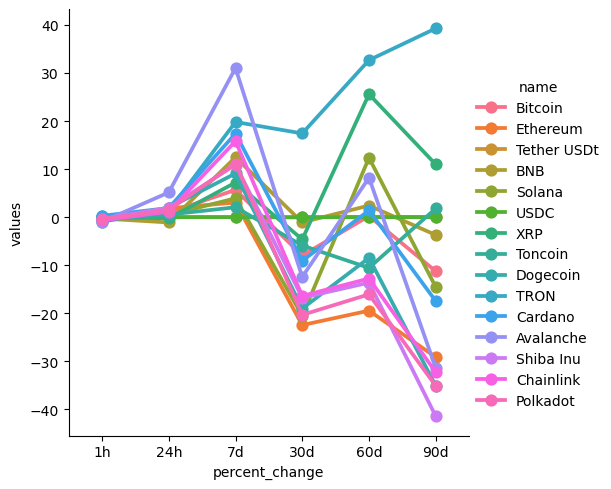

In [119]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [122]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,61337.74772,2024-08-23 20:41:07.728282


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

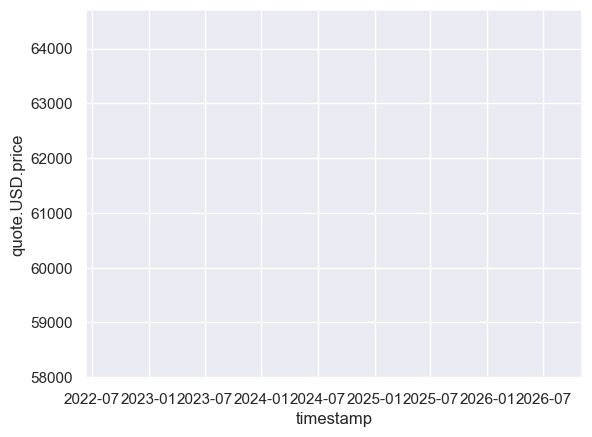

In [124]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)